In [68]:
import theano
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from matplotlib import pyplot as plt
import os, cv2, sys

print("Library imports dones")

Library imports dones


In [24]:
#PATH = os.getcwd()
data_path = ("C:\\Users\\Matt\\Documents\\Mushrooms" + "\\Data")
data_dir_list = os.listdir(data_path)

img_rows=512
img_cols=512
num_channel=1
num_epoch=10
splitpropor=0.7

# Define the number of classes
num_classes = 9

target=[]
imgId = 0
img_data_list=[]

img_list=os.listdir(data_path) #'C:/Users/Matt/Documents/Cours/AI/Mushrooms/Agaricus/'+ dataset
print ('Loaded the images of dataset-'+'{}\n'.format(data_path))
print(img_list,"\n")
for folder in img_list:
    print ('Opening folder '+'{}'.format(data_path), "\\", folder)
    openedFolder = os.listdir(data_path + "\\" + folder)
    nbimg=0
    for img in openedFolder:
        input_img=cv2.imread(data_path + "\\" + folder + '\\' + img )
        #input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(img_rows,img_cols))
        img_data_list.append(input_img_resize)
        target.append(imgId)
        nbimg+=1
        if (nbimg>=100):
            break
    imgId+=1

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255


target = np.array(target)
target = np_utils.to_categorical(target, 9)
target.reshape(target.shape[0],target.shape[1],1)
print(target)


Loaded the images of dataset-C:\Users\Matt\Documents\Mushrooms\Data

['Agaricus', 'Amanita', 'Boletus', 'Cortinarius', 'Entoloma', 'Hygrocybe', 'Lactarius', 'Russula', 'Suillus'] 

Opening folder C:\Users\Matt\Documents\Mushrooms\Data \ Agaricus
Opening folder C:\Users\Matt\Documents\Mushrooms\Data \ Amanita
Opening folder C:\Users\Matt\Documents\Mushrooms\Data \ Boletus
Opening folder C:\Users\Matt\Documents\Mushrooms\Data \ Cortinarius
Opening folder C:\Users\Matt\Documents\Mushrooms\Data \ Entoloma
Opening folder C:\Users\Matt\Documents\Mushrooms\Data \ Hygrocybe
Opening folder C:\Users\Matt\Documents\Mushrooms\Data \ Lactarius
Opening folder C:\Users\Matt\Documents\Mushrooms\Data \ Russula
Opening folder C:\Users\Matt\Documents\Mushrooms\Data \ Suillus
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


900  images
(900, 512, 512, 3)


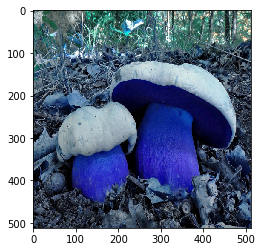

In [25]:
nbOfImgs = img_data.shape[0]

plt.imshow(img_data[np.random.randint(0, nbOfImgs)])
print(nbOfImgs, " images")

#img_data = img_data.reshape(img_data.shape[0], img_data.shape[1], img_data.shape[2], 1)
print(img_data.shape)

splitRank=nbOfImgs*splitpropor
splitRank=int(splitRank)

In [26]:
#We save the data in a buffer
meh = np.array(img_data)
meeh = np.array(target)

In [36]:
#So we can restore them easily if needed
img_data = np.array(meh)
target = np.array(meeh)

In [27]:
#Shuffling the dataset

print(img_data.shape, " / ", target.shape)
randShuffle = np.arange(target.shape[0])
np.random.shuffle(randShuffle)
print(randShuffle)

img_data = img_data[randShuffle]
target = target[randShuffle]
print("\nInput data shuffled !\n", target)

(900, 512, 512, 3)  /  (900, 9)
[530 311  66 203  16 522 248 840 167 375  36 366 259 691 571 170  13 793
 324 800 605  11 119 195 355 284 205  47 663 638 461  93 891 186 807 723
 768 670 198 222 573 210 680 348  43 783 628 553 811 424 406 440 129 127
 895 827 293 809 458 701 711 526 719 558 360 791 892 872 321 480 352 230
 327 694 220 448 762 724 206 279 280 810 692 893 112 787 647 849 531 467
  33 718 445 875 789 630 302  26 618 831 387 593 144 795 735  83 683 181
 645 589  97 773 596 188 218 845 830 190 299 459 317 803 834  65 681 234
  22 751 365 566 661 123 471 297 536 847 164 450  96 468 354 389 102 339
 855 742 385 574 367 493 664 242 535 703 785 166 363 379  84 426 604 671
 626 777 780 786 399 826 640 373 835 763  45  67 476 550 537  10 194 611
 254 143 541 303 433 155 606 613 727 801 453   1 753 239  29 778 682 249
  54 883 621 154 631 475 142  61 867 825 696 173  20 430 685 552 125 695
 853 332 632 481 746 510 799 466 168 560 191 131 208  14 674 629  34 752
 213  48 888 898 50

In [28]:
#Splitting of the dataset

(X_train, y_train), (X_test, y_test) = (img_data[:splitRank], target[:splitRank]), (img_data[splitRank:], target[splitRank:])
print(X_train.shape, " + ", X_test.shape, " = ", X_train.shape[0]+X_test.shape[0])

(630, 512, 512, 3)  +  (270, 512, 512, 3)  =  900


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print (X_train.shape)

plt.imshow(X_train[0])

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
print(X_train.shape)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(Y_train)

In [ ]:
model = Sequential()

model.add(Convolution2D(32, (8, 8), strides=4, activation="relu", input_shape=(28,28,1)))
print (model.output_shape)

model.add(Convolution2D(32, (5, 5), strides=3, activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.3))

model.add(Convolution2D(32, (3, 3), strides=2, activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.15))

In [128]:
model = Sequential()

model.add(Convolution2D(32, (8, 8), strides=4, activation="relu", input_shape=(512,512,3)))
print (model.output_shape)

model.add(Convolution2D(32, (5, 5), strides=3, activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.3))

model.add(Convolution2D(32, (3, 3), strides=2, activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.15))

(None, 127, 127, 32)


In [129]:
model.add(Flatten())

model.add(Dense(600, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(500, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(500, activation="relu"))
model.add(Dropout(0.4))

model.add(Dense(400, activation="relu"))
model.add(Dropout(0.4))

model.add(Dense(400, activation="relu"))
model.add(Dropout(0.3))


model.add(Dense(200, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(50, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(9, activation="softmax"))

In [132]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

hist = model.fit(X_train, y_train, batch_size=30, epochs=30, verbose=1)

Epoch 1/30
630/630 [==============================] - 18s 28ms/step - loss: 2.0679 - acc: 0.1794
Epoch 2/30
630/630 [==============================] - 20s 31ms/step - loss: 2.0233 - acc: 0.1984
Epoch 3/30
630/630 [==============================] - 21s 33ms/step - loss: 2.0128 - acc: 0.1937
Epoch 4/30
630/630 [==============================] - 21s 33ms/step - loss: 2.0475 - acc: 0.1968
Epoch 5/30
630/630 [==============================] - 21s 33ms/step - loss: 1.9838 - acc: 0.2476
Epoch 6/30
630/630 [==============================] - 21s 33ms/step - loss: 1.9551 - acc: 0.2333
Epoch 7/30
630/630 [==============================] - 21s 34ms/step - loss: 1.9338 - acc: 0.2619
Epoch 8/30
630/630 [==============================] - 21s 33ms/step - loss: 1.9547 - acc: 0.2381
Epoch 9/30
630/630 [==============================] - 21s 33ms/step - loss: 1.9144 - acc: 0.2651
Epoch 10/30
630/630 [==============================] - 22s 34ms/step - loss: 1.9253 - acc: 0.2476
Epoch 11/30
630/630 [========

In [131]:
score = model.evaluate(X_test, y_test, verbose=0)
print(score)

[2.044062533201995, 0.15555555566593451]


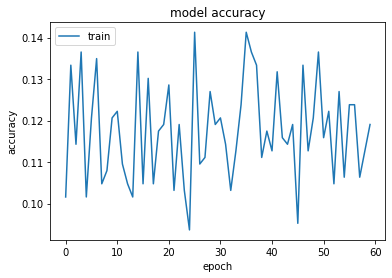

In [119]:
plt.plot(hist.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [102]:
results = model.predict(X_test)

The image shows a Boletus
It was supposed to be a  Boletus


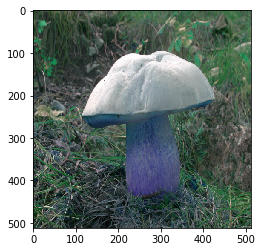

In [110]:
whichone = np.random.randint(0, X_test.shape[0])

plt.imshow(X_test[whichone])
res = results[whichone]
#print(out[whichone])
print( "The image shows a", img_list[[i for i,x in enumerate(res) if x == res.max()][0]])
print("It was supposed to be a ", img_list[[i for i,x in enumerate(y_test[whichone]) if x == y_test[whichone].max()][0]])


In [ ]:
whichone = np.random.randint(0, X_test.shape[0])

plt.imshow(X_test[whichone])
res = results[whichone]
#print(out[whichone])
print( "The image shows a", [i for i,x in enumerate(res) if x == res.max()][0])
print("It was supposed to be a ", [i for i,x in enumerate(y_test[whichone]) if x == y_test[whichone].max()][0])
